# Make figure 3
## Combine heatmap, barplot, and NMDS into multipanel figure
### Copy in needed code from each of those scripts

### (a) Heatmap

pdf 
  2

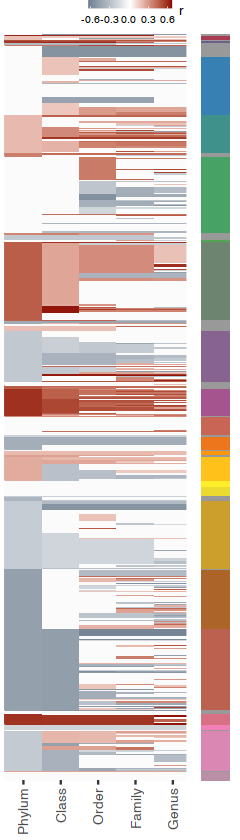

In [249]:
# Import module
source("../modules/7_Corr_heatmap_module_v0.1.R")

# Import data
Taxons3d <-read.table("../data/colors/Silva_taxonomy_color_pallete.txt", sep="\t", header = T)
CH4corrRanksOTU <- read.table("correlations/CH4corrRanks_SilvaOTU.txt", sep = '\t')

# Drop OTU level data
CH4corrRanks <-CH4corrRanksOTU[,1:(ncol(CH4corrRanksOTU)-2)]
Tax_corrU <- unique(CH4corrRanks)

# Make plot
figure3a <- Tax_heat_corrRanks(Taxons3d, Tax_corrU, heat_cols=grey_red)

options(repr.plot.width = 2, repr.plot.height = 7)

figure3a

pdf("../figs/Figure3a.pdf", width = 1.5, height = 3.5)
figure3a
dev.off()

### (b) Barplot

Using Taxonomy as id variables



pdf 
  2

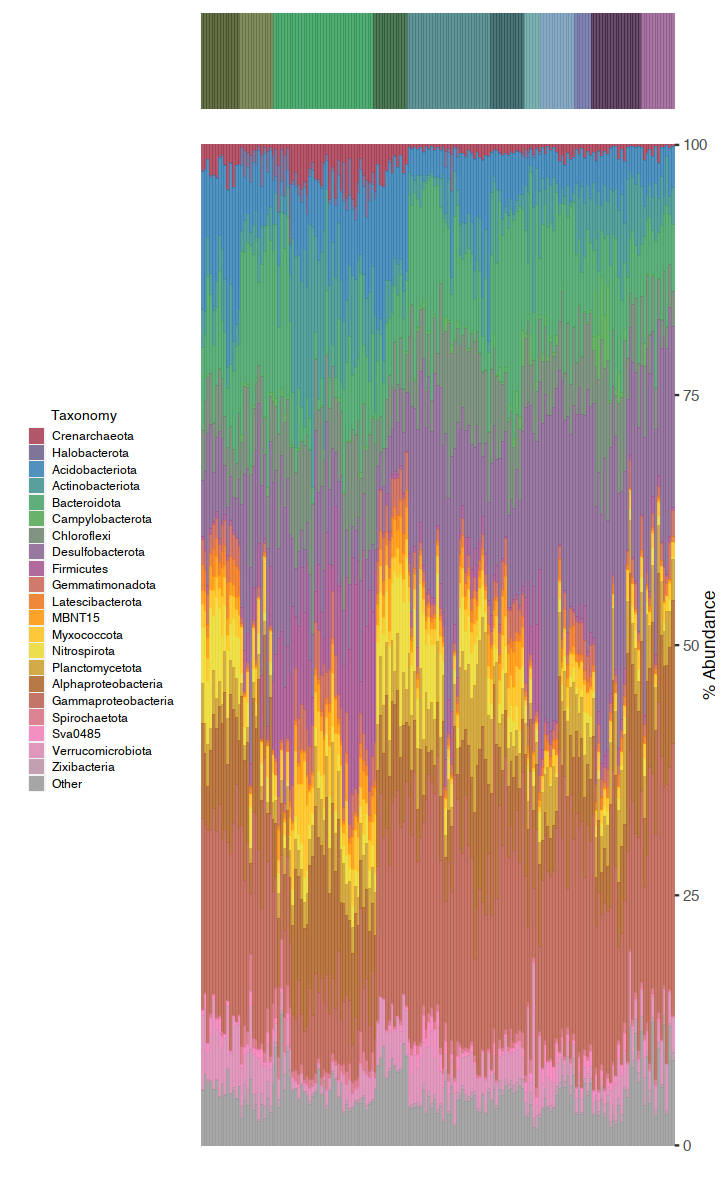

In [238]:
# Import module
source("../modules/5_OTU_barplots_module_v0.4.R")

# Import OTU Table
SilvaOTUs <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t')#, row.names=1)
row.names(SilvaOTUs) <-SilvaOTUs[,"OTU"]                                # Make OTU row names -- required!!!
otu_V <- SilvaOTUs

# Sort OTU table                                                                      
otu_V <-otu_V[order(otu_V$Consensus.lineage),]                                                         # sort by lineage

# Make new top level plotting var (should be in PRE-PROCESS ? )
otu_V$Taxonomy <- ifelse(otu_V$Phylum == "Proteobacteria", paste(otu_V$Class), paste(otu_V$Phylum))    # head(otu_V)
otu_V <- data.frame(otu_V)

# Metadata
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...

# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)               # site_colors
colnames(site_colors) <-c('color','Location')                                                        # site_colors
site_colours <- (site_colors$color)

# SILVA color pallete
Silva_colors <- read.table("../data/colors/Silva_taxonomy_color_pallete.txt", sep="\t", header = T)

# Make plot
figure3b <- abund_loc_barplot(otu_V, "Taxonomy", metaDB, order_var = "EWsiteHyd_index", plot = "",
                               colors = Silva_colors, color_set = Silva_colors, relab="% Abundance")

options(repr.plot.width = 6, repr.plot.height = 10)

figure3b

pdf("../figs/Figure3b.pdf", width = 5, height = 4)
figure3b
dev.off()

### (c) NMDS

Square root transformation
Wisconsin double standardization
Run 0 stress 0.06596923 
Run 1 stress 0.06586727 
... New best solution
... Procrustes: rmse 0.004468045  max resid 0.05444454 
Run 2 stress 0.06586668 
... New best solution
... Procrustes: rmse 9.65722e-05  max resid 0.0009467941 
... Similar to previous best
Run 3 stress 0.06586665 
... New best solution
... Procrustes: rmse 2.215044e-05  max resid 0.0002628212 
... Similar to previous best
Run 4 stress 0.0659691 
... Procrustes: rmse 0.004461603  max resid 0.05447908 
Run 5 stress 0.06596908 
... Procrustes: rmse 0.00445508  max resid 0.05444727 
Run 6 stress 0.06586656 
... New best solution
... Procrustes: rmse 0.000209434  max resid 0.00179929 
... Similar to previous best
Run 7 stress 0.06586675 
... Procrustes: rmse 0.0002213431  max resid 0.001909596 
... Similar to previous best
Run 8 stress 0.06596907 
... Procrustes: rmse 0.004449933  max resid 0.05447444 
Run 9 stress 0.06596927 
... Procrustes: rmse 0.004431865 

pdf 
  2

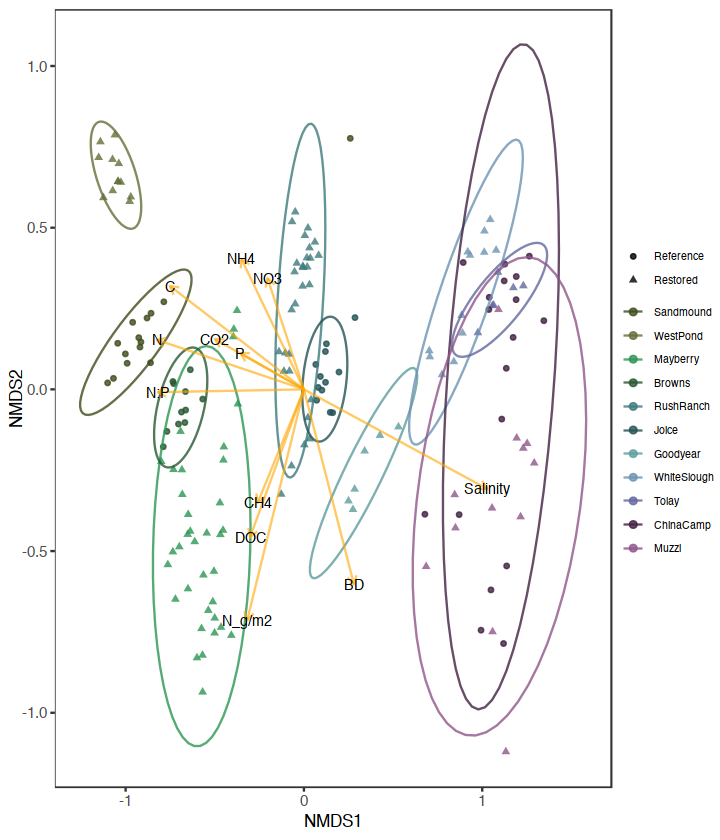

In [230]:
# Import OTU Table
OTU_v <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)                   # dim(OTU_v); head(OTU_v)

# Sort OTU table                                                                      
otu_V <-OTU_v[order(OTU_v$Consensus.lineage),]                                  # sort by lineage  

# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)          # site_colors
site_colours <- (site_colors$Salpal3_col)                                                                   # only color
site_col <- site_colours

# Import Sample mapping
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3b_gap_fill_MDS.txt", sep="\t", header=TRUE)          # Import Metadata, keep all    
#metaDB <-read.table("SF_sal_meta_FIX3b.txt", sep="\t", header=TRUE)          # Import Metadata, keep all    
row.names(metaDB) <- metaDB$Sample                                          # Row names are samples for phyloseq             
metaDB = metaDB[,-1]

# Get matching OTU samples and metadata samples (now done by preprocess?)
# Get Sample names in OTU table               
OTU_samps <- data.frame('Sample'=colnames(otu_V))                #OTU_samps

# Merge site order and Samples
Meta_iTag <- merge(metaDB, OTU_samps, by='Sample')               #colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample

# Resort meta itag by index
indexer = 'EWsiteHyd_index'
Meta_iTag <- Meta_iTag[order(Meta_iTag[indexer]),]

# Reorder factors as needed
# Reorder location factor
Meta_iTag$Location <-factor(Meta_iTag$Location, levels=c("Sandmound","WestPond","Mayberry","Browns","RushRanch","Joice","Goodyear","WhiteSlough","Tolay","ChinaCamp","Muzzi"))  #head(Meta_iTag)
Meta_iTag$Pl_Sp <-factor(Meta_iTag$Pl_Sp, levels=c("Cattail","Tule","ThreeSq","CattailNL","Phrag","PW","Cord"))

# Def NMDS vars
# Prepare data, cats for NMDS plot  -- move up to top or in function?
Location <-Meta_iTag$Location                                                    # Get Location vector from meta_iTag
Restor <- Meta_iTag$EWcoastGroup
Plant <- Meta_iTag$Pl_Sp

# Make sure data used for NMDS is numeric
chem_cols <- sapply(Meta_iTag, is.numeric)  
Env_chem <- Meta_iTag[chem_cols]

### Select and rename vars
keep_vars <-c('Salinity.x', 'Bulk_dens', 'CO2_mg_m2_h', 'CH4_ug_m2_h', 'C', 'N', 'P', 'N_g_m2', #'C_g_m2', 
              'CN','NP', 'NO3_N', 'NH4_N', 'DOC_mg_L')#, 'NO2_pw','NO3_pw','NH3_pw',)#,

Env_chem <-Env_chem[keep_vars]

### CAREFUL HERE, lazy renaming... comment out when testing newvars.
colnames(Env_chem) <-c('Salinity', 'BD', 'CO2', 'CH4', 'C', 'N', 'P', 'N_g/m2',                  #'C_m2', 
                       'C:N', 'N:P', 'NO3_s', 'NH4_s', 'DOC')#, 'NO2_pw','NO3_pw','NH3_pw')

# Import module
source("../modules/4_OTU_plotting_module_NMDS_1.7.r")

# Make plot
figure3c <- NMDS_group_shape_fit(otu_V, Location, Restor, Env_chem)

options(repr.plot.width = 6, repr.plot.height = 7)

figure3c

pdf("../figs/Figure3c.pdf", width = 6, height = 6)
figure3c
dev.off()


## Make multipanel figure

pdf 
  2

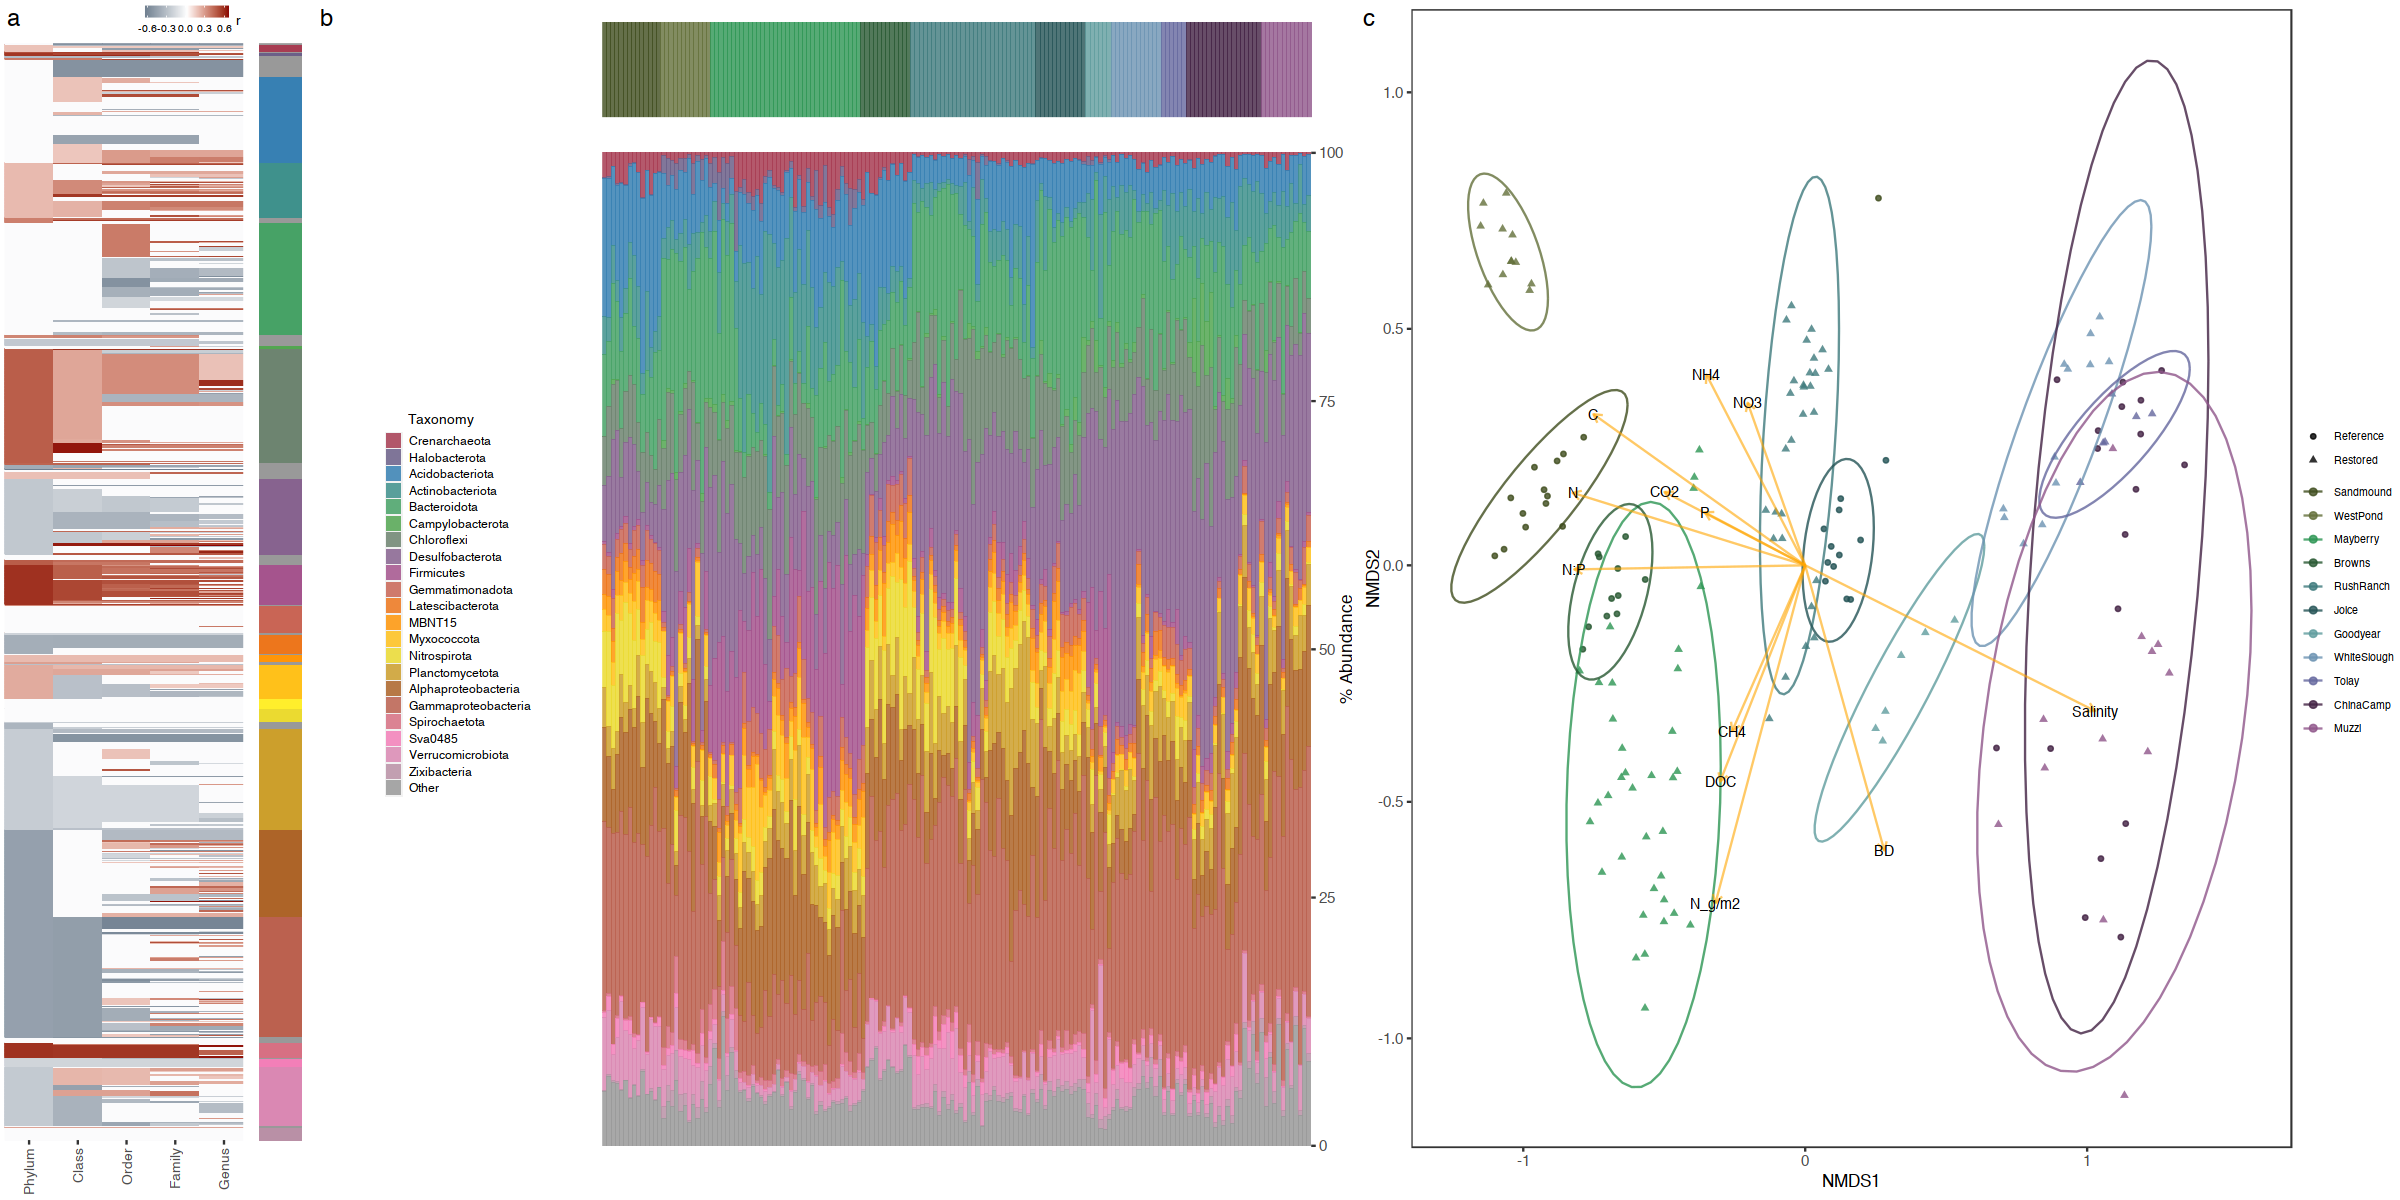

In [250]:
options(repr.plot.width = 20, repr.plot.height = 10)
figure3 <- plot_grid(figure3a, figure3b, figure3c, ncol = 3, align = "hv", rel_widths = c(0.6, 2, 2), axis = "t",
                    labels = c("a", "b", "c"))
figure3

pdf("../figs/Figure3.pdf", width = 11, height = 4)
figure3
dev.off()